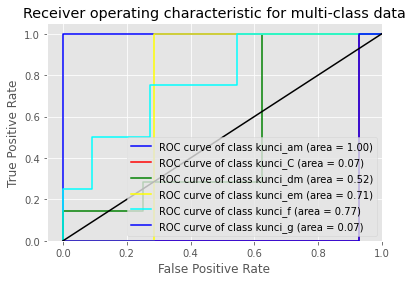

Accuracy Score:  0.13333333333333333
              precision    recall  f1-score   support

     kunci_C       0.17      1.00      0.29         1
    kunci_am       0.20      1.00      0.33         1
    kunci_dm       0.00      0.00      0.00         7
    kunci_em       0.00      0.00      0.00         1
     kunci_f       0.00      0.00      0.00         4
     kunci_g       0.00      0.00      0.00         1

    accuracy                           0.13        15
   macro avg       0.06      0.33      0.10        15
weighted avg       0.02      0.13      0.04        15



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import pandas
plt.style.use('ggplot')

# dataframe = pandas.read_csv("datasetall.csv", header=None)
dataframe = pandas.read_csv("awalDATASET.csv", header=None)
dataset = dataframe.values
column = 1000
X = dataset[:,0:column:].astype(float) # X diambil dari seluruh baris, kolom 2 s.d kolom 1500-1
y = dataset[:,column] # Y diambil dari seluruh baris, kolom 1
classes = ['kunci_am', 'kunci_C', 'kunci_dm', 'kunci_em', 'kunci_f','kunci_g']
# Binarize the output
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]
# We split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size
= 0.2, random_state=0)
#We define the model as an SVC in OneVsRestClassifier setting.
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True
))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'cyan'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
# We split the data into training and test sets for training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
# the model
classifier_svc = svm.SVC(kernel='rbf',random_state=0)
# fit the model using the training set
classifier_svc.fit(X_train, y_train)
# predict the labels/classes of the test set
y_pred = classifier_svc.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

# Use accuracy_score to get accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', acc)
print(classification_report(y_test, y_pred))